In [1]:
import pandas as pd
from scipy.stats import linregress
import scipy.stats as st
import matplotlib.pyplot as plt
#pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
# create the raw dataframe from the CSV
raw_data = pd.read_csv("raw-2005-2019 (4).csv")
regions = pd.read_csv("Country divided by regions(world Bank).csv")

# Drop unsused columns and rename needed columns for region
regions = regions[["Region", "TableName"]]
regions = regions.rename(columns={"TableName" : "Country name"})

# Create the the dataframe being used for the gini index comparison 
gini_index = pd.merge(raw_data.dropna(), regions)
gini_index_2010 = gini_index.loc[gini_index["year"] == 2010]
gini_index_2015 = gini_index.loc[gini_index["year"] == 2015]

#Create main clean data without the GINI index
clean_data = raw_data.drop("GINI index (World Bank estimate)", 1)

#Get data for the 3 most recent years
clean_data = clean_data.loc[clean_data["year"] >= 2017]


merged_data = pd.merge(clean_data, regions, on = "Country name")

#### Add the countries that were left out 

In [3]:
merged_renamed = merged_data.rename(columns={"Country name": "Country Name", "Social support": "Social Support", "Healthy life expectancy at birth": "HALE", "Life Ladder": "Happiness Score", "Log GDP per capita": "GDP per Capita(ln)"})
# Create an empty list to store the values that are not found in the regions list
not_in_list = []

# Create a list for
regions_list = regions["Country name"].tolist()

for index, row in clean_data.iterrows():
      if row["Country name"] not in regions_list:
            not_in_list.append(row["Country name"])
# Drop the duplicates to see the countries excluded from the merge due to country name issues
not_in_list = list(dict.fromkeys(not_in_list))

#### Filter data set to only include countries that have data for all 3 years

In [4]:
#Get a working copy of the merged data to work with
loop_df = pd.DataFrame.copy(merged_renamed)
# loop_df = loop_df.loc[0:10]
#Set global variables
count = 0
country = ""
countries = []

# Create a for loop to get the countries that have data for all 3 years (2017 - 2019)
for index, row in loop_df.iterrows():
    if country != row["Country Name"]:
        country = row["Country Name"]
        count = 0
    elif country == row["Country Name"]:
        count += 1
        if count == 2:
            countries.append( row["Country Name"])

#Get the new Dataframe that countries countries that have data for all 3 years
Final_df = loop_df.set_index("Country Name").loc[countries].reset_index()

#### Analysis Starts here

In [ ]:
# Drop the missing values from HALE and Happiness scores column
cleaned = Final_df.dropna(subset = ["HALE", "Happiness Score"])
hale = cleaned.sort_values(by = "Happiness Score", ascending = False)


hale_2017 = hale.loc[cleaned["year"] == 2017]
hale_2018 = hale.loc[cleaned["year"] == 2018]
hale_2019 = hale.loc[cleaned["year"] == 2019]

In [ ]:
# define your functions
def linear_regressions(x_column,y_column):
    x = x_column
    y = y_column
    (slope, intercept, rval, p_value, st) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_column, y_column)
    plt.xlabel(x_column.name)
    plt.ylabel(y_column.name)
    plt.plot(x,regress_values,"r-")
    print(f"The coefficient of correlation {rval}")
    print(f"The p_value is :{p_value}")
    print(f"R Squared is: {rval** 2}")
    plt.annotate(line_eq,(max(x),max(y)),fontsize=15,color="red")

def remove_outliers(df, df_series):
    quartiles = df_series.quantile([.25,.50,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    IQR = upperq - lowerq
    lower_bound = lowerq - (1.5*IQR)
    upper_bound = upperq + (1.5*IQR)
    df = df.loc[(df_series > lower_bound) & (df_series < upper_bound) ]
    return df

In [ ]:
# Create a boxplot to check for potential outliers in the happiness index.
labels = ["2017-2019", "2017", "2018", "2019"]
plt.boxplot([hale["Happiness Score"], hale_2017["Happiness Score"], hale_2018["Happiness Score"], hale_2019["Happiness Score"]], labels = labels, sym = "b")
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.title("Happiness Comparison across Data Sets")

In [ ]:
# Create a boxplot to check for potential outliers in the HALE series.
plt.boxplot([hale["HALE"], hale_2017["HALE"], hale_2018["HALE"], hale_2019["HALE"]], labels = labels, sym = "b")
plt.xlabel("Year")
plt.ylabel("HALE")
plt.title("HALE Comparison across Data Sets")

In [ ]:
# Remove the outliers so that the data is more accurately reflected.
hale = remove_outliers(hale, hale["Happiness Score"])
hale_2019 = remove_outliers(hale_2019, hale_2019["Happiness Score"])

#### ALL 3 Years

In [ ]:
linear_regressions(hale["HALE"], hale["Happiness Score"])

#### 2017

In [ ]:
linear_regressions(hale_2017["HALE"], hale_2017["Happiness Score"])

#### 2018

In [ ]:
linear_regressions(hale_2018["HALE"], hale_2018["Happiness Score"])

#### 2019

In [ ]:
linear_regressions(hale_2019["HALE"], hale_2019["Happiness Score"])

#### BOTTOM and TOP Corellation

In [ ]:
# Split the data set into the TOP 50% and Bottom 50% based off Happiness 
top_hale = hale.iloc[0:189]
bottom_hale = hale.iloc[189:]
x_top = remove_outliers(top_hale, top_hale["HALE"])[["Country Name", "Happiness Score", "HALE"]]
x_bottom = remove_outliers(bottom_hale, bottom_hale["HALE"])[["Country Name", "Happiness Score", "HALE"]]


In [ ]:
# Top half analysis and regression
linear_regressions(top_hale["HALE"], top_hale["Happiness Score"])

In [ ]:
# Bottom half analysis and regression
linear_regressions(bottom_hale["HALE"], bottom_hale["Happiness Score"])

In [ ]:
x_top.describe()

In [ ]:
x_bottom.describe()

In [ ]:
x_bottom

#### USE THESE GRAPHS MARIA

In [5]:
# define your functions
def linear_regressions(x_column,y_column):
    x = x_column
    y = y_column
    (slope, intercept, rval, p_value, st) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_column, y_column)
    plt.xlabel(x_column.name)
    plt.ylabel(y_column.name)
    plt.plot(x,regress_values,"r-")
    print(f"The coefficient of correlation {rval}")
    print(f"The p_value is :{p_value}")
    print(f"R Squared is: {rval** 2}")
    plt.annotate(line_eq,(max(x),max(y)),fontsize=15,color="red")

def remove_outliers(df, df_series):
    quartiles = df_series.quantile([.25,.50,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    IQR = upperq - lowerq
    lower_bound = lowerq - (1.5*IQR)
    upper_bound = upperq + (1.5*IQR)
    df = df.loc[(df_series > lower_bound) & (df_series < upper_bound) ]
    return df

In [6]:
cleaned = Final_df.dropna(subset = ["HALE", "Happiness Score"])
hale = cleaned.sort_values(by = "Happiness Score", ascending = False)

In [8]:
# Split the data set into the TOP 50% and Bottom 50% based off Happiness 
top_hale = hale.iloc[0:189]
bottom_hale = hale.iloc[189:]
x_top = remove_outliers(top_hale, top_hale["HALE"])[["Country Name", "Happiness Score", "HALE"]]
x_bottom = remove_outliers(bottom_hale, bottom_hale["HALE"])[["Country Name", "Happiness Score", "HALE"]]
# Remove the outliers so that the data is more accurately reflected.
hale = remove_outliers(hale, hale["Happiness Score"])

The coefficient of correlation 0.7389949501812728
The p_value is :2.6463480811835233e-66
R Squared is: 0.5461135363934219


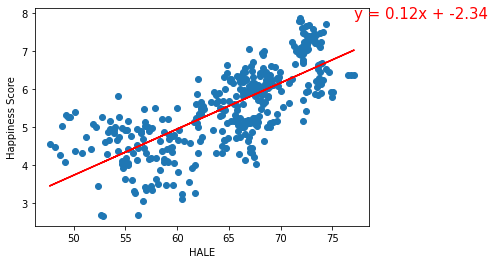

In [9]:
linear_regressions(hale["HALE"], hale["Happiness Score"])

The coefficient of correlation 0.573947105325513
The p_value is :5.962440299178385e-18
R Squared is: 0.32941527971153545


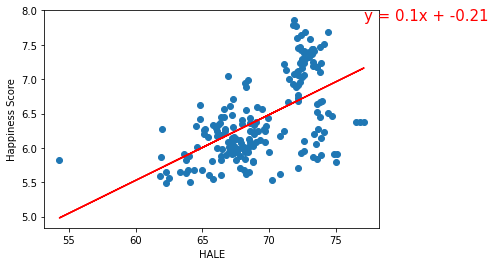

In [10]:
# Top half analysis and regression
linear_regressions(top_hale["HALE"], top_hale["Happiness Score"])

The coefficient of correlation 0.3176734201021654
The p_value is :8.900857419844151e-06
R Squared is: 0.10091640183940688


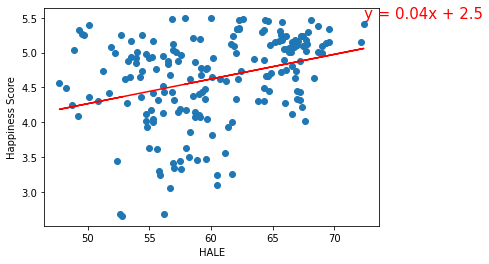

In [11]:
# Bottom half analysis and regression
linear_regressions(bottom_hale["HALE"], bottom_hale["Happiness Score"])